In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
df = pd.concat([df,test])
df.drop(["TXN_TRM"], 1, inplace = True)
df.rename(columns = {"TARGET": "target"}, inplace = True)
df.loc[df.TXN_SOURCE == "R", "TXN_SOURCE"] ="O"
df = df.sort_values(["DAY_OF_MONTH", "CST_NR"])

C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_432/3526205601.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(["TXN_TRM"], 1, inplace = True)


In [2]:
def calc_count(df, by, on, m):
    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']


    # Replace each value by the according smoothed mean
    return df[by].map(counts)

In [3]:
df["hours_txn_time"] = df.TXN_TIME.transform(lambda x : str(x)[:2] if len(str(x)) == 6 else str(x)[:1])
df.hours_txn_time = df.hours_txn_time.astype(int)
df["time"] = (df.DAY_OF_MONTH * 24) + (df.hours_txn_time)
df.drop(["TXN_TIME"], 1, inplace = True)

C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_432/1570018154.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(["TXN_TIME"], 1, inplace = True)


In [4]:
df["ada"] = 1

In [5]:
df = df.join(df.groupby(["CST_NR", "DAY_OF_MONTH"])["MCC_CODE"].nunique(), on = ["CST_NR", "DAY_OF_MONTH"], rsuffix = "_r")
df.rename(columns = {"MCC_CODE_r": "same_day_MCC_CODE_count"}, inplace = True)
df = df.join(df.groupby(["CST_NR", "DAY_OF_MONTH"])["MC_NAME"].nunique(), on = ["CST_NR", "DAY_OF_MONTH"], rsuffix = "_r")
df.rename(columns = {"MC_NAME_r": "same_day_MC_NAME_count"}, inplace = True)
df = df.join(df.groupby(["CST_NR", "DAY_OF_MONTH"])["MC_ID"].nunique(), on = ["CST_NR", "DAY_OF_MONTH"], rsuffix = "_r")
df.rename(columns = {"MC_ID_r": "same_day_MC_ID_count"}, inplace = True)
df = df.join(df.groupby(["CST_NR", "DAY_OF_MONTH"])["CITY"].nunique(), on = ["CST_NR", "DAY_OF_MONTH"], rsuffix = "_r")
df.rename(columns = {"CITY_r": "same_day_city_count"}, inplace = True)
df = df.join(df.groupby(["CST_NR", "DAY_OF_MONTH"])["COUNTRY"].nunique(), on = ["CST_NR", "DAY_OF_MONTH"], rsuffix = "_r")
df.rename(columns = {"COUNTRY_r": "same_day_countries_count"}, inplace = True)

In [6]:
df['country_count'] = calc_count(df.loc[df.DAY_OF_MONTH <= 20], by='COUNTRY', on='ada', m=100)
df['city_target_count'] = calc_count(df.loc[df.DAY_OF_MONTH <= 20], by='CITY', on='ada', m=100)
df['mc_name_target_count'] = calc_count(df.loc[df.DAY_OF_MONTH <= 20], by='MC_NAME', on='ada', m=100)
df['mc_id_target_count'] = calc_count(df.loc[df.DAY_OF_MONTH <= 20], by='MC_ID', on='ada', m=100)
df['mcc_code_target_count'] = calc_count(df.loc[df.DAY_OF_MONTH <= 20], by='MCC_CODE', on='ada', m=100)

In [7]:
categorylabels = ['CST_NR', 'CC_NR',
       'TXN_SOURCE', 'TXN_ENTRY','CITY', 'COUNTRY', 'MC_NAME',
       'MC_ID', 'MCC_CODE', "DAY_OF_MONTH", "DAY_OF_WEEK"]
numericlabels = ["TXN_AMNT", "hours_txn_time", "time"]

In [ ]:
train_small = train.loc[(train.DAY_OF_MONTH < 11) | (train.min_day >= 11)]
test_small =train.loc[(train.DAY_OF_MONTH >= 11) & (train.min_day < 11)]

In [8]:
df["number_of_cards_owned_per_cust"] = df.loc[df.DAY_OF_MONTH <= 20].groupby("CST_NR")["CC_NR"].transform("nunique")
df["number_of_transactions_done_total"] = df.loc[df.DAY_OF_MONTH <= 20].groupby(["CST_NR"])["ada"].transform("sum")
df["transaction_no"] = df.loc[df.DAY_OF_MONTH <= 20].groupby("CST_NR")["ada"].transform("cumsum")

# PARA HARCAMALARLA İLGİLİ KISIM   " TXN_AMNT "

df["total_money_spent_mean"] = df.loc[df.DAY_OF_MONTH <= 20].groupby(["CST_NR"])["TXN_AMNT"].transform("mean")
df["total_money_spent"] = df.loc[df.DAY_OF_MONTH <= 20].groupby(["CST_NR"])["TXN_AMNT"].transform("sum")
df["total_money_spent_cumsum"] = df.loc[df.DAY_OF_MONTH <= 20].groupby(["CST_NR"])["TXN_AMNT"].transform("cumsum")
df["total_money_spent_std"] = df.loc[df.DAY_OF_MONTH <= 20].groupby(["CST_NR"])["TXN_AMNT"].transform("std")

df["amount_change_ratio_between_tx"] = df.loc[df.DAY_OF_MONTH <= 20].groupby(["CST_NR"])["TXN_AMNT"].transform("pct_change")
df["time_change_ratio_between_tx"] = df.loc[df.DAY_OF_MONTH <= 20].groupby(["CST_NR"])["time"].transform("pct_change")


In [9]:
df.drop(["ada"],1 ,inplace = True)

C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_432/3415197218.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df.drop(["ada"],1 ,inplace = True)


In [10]:
train = df.loc[df.target.notnull()]

In [11]:

train["max_day"] = train.groupby("CST_NR")["DAY_OF_MONTH"].transform("max")
train["min_day"] = train.groupby("CST_NR")["DAY_OF_MONTH"].transform("min")
train_small = train.loc[(train.DAY_OF_MONTH < 11) | (train.min_day >= 11)]
test_small =train.loc[(train.DAY_OF_MONTH >= 11) & (train.min_day < 11)]

C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_432/1060930971.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["max_day"] = train.groupby("CST_NR")["DAY_OF_MONTH"].transform("max")
C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_432/1060930971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["min_day"] = train.groupby("CST_NR")["DAY_OF_MONTH"].transform("min")


In [15]:
train

,target,CST_NR,CC_NR,DAY_OF_MONTH,DAY_OF_WEEK,TXN_SOURCE,TXN_ENTRY,TXN_AMNT,CITY,COUNTRY,...,number_of_transactions_done_total,transaction_no,total_money_spent_mean,total_money_spent,total_money_spent_cumsum,total_money_spent_std,amount_change_ratio_between_tx,time_change_ratio_between_tx,max_day,min_day
351663,0.0,00004c222f3aaeb05ae9ea63a1aade6b3928fcd9f9994f...,cd176b2f45d8f188877cd7f8300e63804ae287c8eea085...,1.0,4.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,30.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,11,1,286.363636,3150.0,30.0,234.361803,NaN,NaN,18.0,1.0
565661,0.0,0006477db0829709f8f23dbdd1a2b64d61f4f160822042...,bccd9f720718020db8e790adf1a992effc479874dd98f4...,1.0,4.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,10.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,9,1,122.222222,1100.0,10.0,152.543254,NaN,NaN,19.0,1.0
565663,0.0,0006477db0829709f8f23dbdd1a2b64d61f4f160822042...,bccd9f720718020db8e790adf1a992effc479874dd98f4...,1.0,4.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,70.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,9,2,122.222222,1100.0,80.0,152.543254,6.000000,-0.108108,19.0,1.0
8680,0.0,00064c26e9331dcec45e048065c6b705faa50dbfaead65...,8789e4f6d7c9b6162cc0d85c32aa696aba5a107adb1a16...,1.0,4.0,O,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,330.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,24,1,309.166667,7420.0,330.0,209.614899,NaN,NaN,18.0,1.0
8684,0.0,00064c26e9331dcec45e048065c6b705faa50dbfaead65...,8789e4f6d7c9b6162cc0d85c32aa696aba5a107adb1a16...,1.0,4.0,O,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,280.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,24,2,309.166667,7420.0,610.0,209.614899,-0.151515,-0.052632,18.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357793,0.0,fff74c7190a28e6d49c5dd7f2bc097d92aecb28fed790e...,63cdfcdcee36cae183ae4efad5c53868463fc850f997df...,20.0,2.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,20.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,18,17,23.888889,430.0,410.0,6.076850,-0.333333,0.054622,20.0,2.0
357797,0.0,fff74c7190a28e6d49c5dd7f2bc097d92aecb28fed790e...,63cdfcdcee36cae183ae4efad5c53868463fc850f997df...,20.0,2.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,20.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,18,18,23.888889,430.0,430.0,6.076850,0.000000,0.000000,20.0,2.0
455940,0.0,fff801bc5262a80674018bafb4d81dfef33f02973ecb56...,90fd66a9f8085cd7052a12df0467f721fde43a439a2cb4...,20.0,2.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,1000.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,9,9,383.333333,3450.0,3450.0,257.633461,9.000000,0.167053,20.0,6.0
392325,0.0,fffc0325496dfe7dccf131b0c19db52fcdbb01dbdcc691...,44f746b47ce8980d14dde1b782e899fe16109506e381f6...,20.0,2.0,V,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,50.0,15fdddb9a21629e4a06038cc97612b6e1174842998c6c8...,d2e685c2ad187427e826956fc5be5b0f36eb758fb4a354...,...,15,14,70.666667,1060.0,1050.0,105.996406,0.666667,0.092342,20.0,3.0


In [14]:
test_small

,target,CST_NR,CC_NR,DAY_OF_MONTH,DAY_OF_WEEK,TXN_SOURCE,TXN_ENTRY,TXN_AMNT,CITY,COUNTRY,...,number_of_transactions_done_total,transaction_no,total_money_spent_mean,total_money_spent,total_money_spent_cumsum,total_money_spent_std,amount_change_ratio_between_tx,time_change_ratio_between_tx,max_day,min_day
351669,0.0,00004c222f3aaeb05ae9ea63a1aade6b3928fcd9f9994f...,cd176b2f45d8f188877cd7f8300e63804ae287c8eea085...,11.0,7.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,490.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,11,4,286.363636,3150.0,590.0,234.361803,15.333333,0.315271,18.0,1.0
141372,0.0,00004d2172cba773822b41707ccba6a6f0f4cbc582f326...,4288d9d717858ba4f0e1d53cb555c15b5c7edc1c8fe685...,11.0,7.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,60.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,30,13,166.000000,4980.0,1770.0,134.513171,1.000000,0.019157,20.0,2.0
141373,0.0,00004d2172cba773822b41707ccba6a6f0f4cbc582f326...,4288d9d717858ba4f0e1d53cb555c15b5c7edc1c8fe685...,11.0,7.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,50.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,30,14,166.000000,4980.0,1820.0,134.513171,-0.166667,0.071429,20.0,2.0
141376,0.0,00004d2172cba773822b41707ccba6a6f0f4cbc582f326...,4288d9d717858ba4f0e1d53cb555c15b5c7edc1c8fe685...,11.0,7.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,60.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,30,15,166.000000,4980.0,1880.0,134.513171,0.200000,-0.038596,20.0,2.0
141377,0.0,00004d2172cba773822b41707ccba6a6f0f4cbc582f326...,4288d9d717858ba4f0e1d53cb555c15b5c7edc1c8fe685...,11.0,7.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,50.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,30,16,166.000000,4980.0,1930.0,134.513171,-0.166667,0.000000,20.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357793,0.0,fff74c7190a28e6d49c5dd7f2bc097d92aecb28fed790e...,63cdfcdcee36cae183ae4efad5c53868463fc850f997df...,20.0,2.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,20.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,18,17,23.888889,430.0,410.0,6.076850,-0.333333,0.054622,20.0,2.0
357797,0.0,fff74c7190a28e6d49c5dd7f2bc097d92aecb28fed790e...,63cdfcdcee36cae183ae4efad5c53868463fc850f997df...,20.0,2.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,20.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,18,18,23.888889,430.0,430.0,6.076850,0.000000,0.000000,20.0,2.0
455940,0.0,fff801bc5262a80674018bafb4d81dfef33f02973ecb56...,90fd66a9f8085cd7052a12df0467f721fde43a439a2cb4...,20.0,2.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,1000.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,9,9,383.333333,3450.0,3450.0,257.633461,9.000000,0.167053,20.0,6.0
392325,0.0,fffc0325496dfe7dccf131b0c19db52fcdbb01dbdcc691...,44f746b47ce8980d14dde1b782e899fe16109506e381f6...,20.0,2.0,V,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,50.0,15fdddb9a21629e4a06038cc97612b6e1174842998c6c8...,d2e685c2ad187427e826956fc5be5b0f36eb758fb4a354...,...,15,14,70.666667,1060.0,1050.0,105.996406,0.666667,0.092342,20.0,3.0


In [12]:
train_small

,target,CST_NR,CC_NR,DAY_OF_MONTH,DAY_OF_WEEK,TXN_SOURCE,TXN_ENTRY,TXN_AMNT,CITY,COUNTRY,...,number_of_transactions_done_total,transaction_no,total_money_spent_mean,total_money_spent,total_money_spent_cumsum,total_money_spent_std,amount_change_ratio_between_tx,time_change_ratio_between_tx,max_day,min_day
351663,0.0,00004c222f3aaeb05ae9ea63a1aade6b3928fcd9f9994f...,cd176b2f45d8f188877cd7f8300e63804ae287c8eea085...,1.0,4.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,30.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,11,1,286.363636,3150.0,30.0,234.361803,NaN,NaN,18.0,1.0
565661,0.0,0006477db0829709f8f23dbdd1a2b64d61f4f160822042...,bccd9f720718020db8e790adf1a992effc479874dd98f4...,1.0,4.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,10.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,9,1,122.222222,1100.0,10.0,152.543254,NaN,NaN,19.0,1.0
565663,0.0,0006477db0829709f8f23dbdd1a2b64d61f4f160822042...,bccd9f720718020db8e790adf1a992effc479874dd98f4...,1.0,4.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,70.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,9,2,122.222222,1100.0,80.0,152.543254,6.000000,-0.108108,19.0,1.0
8680,0.0,00064c26e9331dcec45e048065c6b705faa50dbfaead65...,8789e4f6d7c9b6162cc0d85c32aa696aba5a107adb1a16...,1.0,4.0,O,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,330.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,24,1,309.166667,7420.0,330.0,209.614899,NaN,NaN,18.0,1.0
8684,0.0,00064c26e9331dcec45e048065c6b705faa50dbfaead65...,8789e4f6d7c9b6162cc0d85c32aa696aba5a107adb1a16...,1.0,4.0,O,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,280.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,24,2,309.166667,7420.0,610.0,209.614899,-0.151515,-0.052632,18.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408684,0.0,ffdb6292c6c3564443359b38766b9e74fc753f96639ba3...,b957fb4e1bae28167faf6b831f77b46930fd5ccc7dea8f...,20.0,2.0,O,12b4164904d6ecac8163670f59dc63330075d27d1d191a...,160.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,4,4,75.000000,300.0,300.0,59.160798,1.285714,0.080786,20.0,13.0
589344,0.0,ffdde61c9a5b9a75c8261bc4a15778307cb0399f93f9a5...,29c75f7aab01a5dc970beeea9d0480c3eb8975e4b26f66...,20.0,2.0,O,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,5200.0,a9558088fa4485bd41475933e88548c0960bb3e6a784e7...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,1,1,5200.000000,5200.0,5200.0,NaN,NaN,NaN,20.0,20.0
282734,0.0,ffdf592114fcc22be62fb4988993b5d62b73811726614c...,78596ef9728f0c914a16175b0b3eb622bf3cb37baf2a2a...,20.0,2.0,B,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,10.0,8c1e38274fba4c2119fd88120b70c29cd468c6444058da...,368a2b6e4893c8ab01c18959a187dcde2ab916161f72e1...,...,1,1,10.000000,10.0,10.0,NaN,NaN,NaN,20.0,20.0
576407,0.0,ffe53664893d4031499db4d4f409d30e1707a19d65e00b...,9e12b7ea74e3e9aff82736d97c995ff9983c3a7f465dc4...,20.0,2.0,V,12d7720f7273e2a1cfb2adf5daba868b767db6281b34b3...,20.0,d13562d1ecad08791c87820c9d2d484a5c88e58b502c7a...,edc835921a97d2d5d1b786732d546217cafcdc903867c7...,...,2,2,20.000000,40.0,40.0,0.000000,0.000000,0.173077,20.0,17.0


In [12]:
import pandas as pd
from sklearn.metrics import roc_auc_score
cat_feat_to_encode = categorylabels;  smoothing=0.15
train_y = train_small['target']
import category_encoders as ce
oof = pd.DataFrame([])
from sklearn.model_selection import StratifiedKFold
for tr_idx, oof_idx in StratifiedKFold(n_splits=5, random_state=2020, shuffle=True).split(train_small, train_y):
    print("***********")
    ce_target_encoder = ce.TargetEncoder(cols = cat_feat_to_encode, smoothing=smoothing)
    ce_target_encoder.fit(train_small.iloc[tr_idx, :], train_y.iloc[tr_idx])
    oof = oof.append(ce_target_encoder.transform(train_small.iloc[oof_idx, :]), ignore_index=False)
ce_target_encoder = ce.TargetEncoder(cols = cat_feat_to_encode, smoothing=smoothing)
ce_target_encoder.fit(train_small, train_y);  train_small = oof.sort_index();
test_small_transformed = ce_target_encoder.transform(test_small)

***********
***********
***********
***********
***********


In [13]:
train_small.loc[train_small.amount_change_ratio_between_tx > 5000000, "amount_change_ratio_between_tx"] = 0
test_small_transformed.loc[test_small_transformed.amount_change_ratio_between_tx > 5000000, "amount_change_ratio_between_tx"] = 0


In [14]:
train_small.drop(["min_day", "max_day"], 1, inplace = True)
test_small_transformed.drop(["min_day", "max_day"], 1, inplace = True)

C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_3556/2144247640.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train_small.drop(["min_day", "max_day"], 1, inplace = True)
C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_3556/2144247640.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test_small_transformed.drop(["min_day", "max_day"], 1, inplace = True)


In [15]:
import lightgbm as lgb
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import gc
import os
import lightgbm
import pandas as pd
import numpy as np
from lightgbm import LGBMClassifier
import lightgbm as lgbm
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score
import optuna
from optuna.visualization import plot_optimization_history, plot_param_importances
from IPython.display import display

In [16]:
X = train_small.drop(["ID", "target"], 1)
y = train_small.target

C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_3556/1629168930.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = train_small.drop(["ID", "target"], 1)


In [17]:
test_x = test_small_transformed.drop(["ID", "target"], 1)
test_y = test_small_transformed.target

C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_3556/3944749501.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test_x = test_small_transformed.drop(["ID", "target"], 1)


In [20]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import KFold, StratifiedKFold

In [21]:
def objective(trial):
    
    param = {
        "n_estimators": 10000,
        "learning_rate" : 0.05,
        "metric": "auc",
        "objective": "binary",
        "boosting_type": "gbdt",
        'reg_alpha': trial.suggest_float('reg_alpha', 0.001, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.001, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 5, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'max_depth': trial.suggest_int('max_depth', 5, 64),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 0.5),
        'cat_smooth' : trial.suggest_int('cat_smooth', 10, 100),
        'cat_l2': trial.suggest_int('cat_l2', 1, 20),
        'min_data_per_group': trial.suggest_int('min_data_per_group', 50, 200),
        "is_unbalance" : True,
        "verbose": 50
    }
    model = lgb.LGBMClassifier(**param)
    skf = StratifiedKFold(n_splits=5)
    auc = 0
    for i, (train_idx, test_idx) in enumerate(skf.split(test_x, test_y)):
        print(f"\n----- FOLD {i} -----")

        X_train = test_x.iloc[train_idx]
        y_train = test_y.iloc[train_idx]
        X_val = test_x.iloc[test_idx]
        y_val = test_y.iloc[test_idx]

        X_train = pd.concat([X, X_train])
        y_train = pd.concat([y, y_train])
    
        model.fit(X_train, y_train, eval_set=[(X_val,y_val)],verbose = 500, early_stopping_rounds = 100)
    
        preds = model.predict_proba(X_val)
    
        auc += roc_auc_score(y_val, preds[:,1])
        print(f"Fold {i} | Eval AUC: {auc/(i+1)}")
    
    return auc / 5

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=80, n_jobs = -1)
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)

[I 2021-11-24 17:05:42,193] A new study created in memory with name: no-name-361c4475-d0b4-41bc-a589-c8273c159d41



----- FOLD 0 -----

----- FOLD 0 -----

----- FOLD 0 -----

----- FOLD 0 -----

----- FOLD 0 -----

----- FOLD 0 -----

----- FOLD 0 -----

----- FOLD 0 -----
Fold 0 | Eval AUC: 0.9625191299149759

----- FOLD 1 -----
Fold 1 | Eval AUC: 0.9571748428272797

----- FOLD 2 -----
Fold 0 | Eval AUC: 0.9555753559448072

----- FOLD 1 -----
Fold 0 | Eval AUC: 0.9578924123310661

----- FOLD 1 -----
[500]	valid_0's auc: 0.941233
Fold 2 | Eval AUC: 0.9531846085378829

----- FOLD 3 -----
Fold 1 | Eval AUC: 0.9480113576952331

----- FOLD 2 -----
Fold 0 | Eval AUC: 0.9595931002890286

----- FOLD 1 -----
Fold 3 | Eval AUC: 0.9525695205534679

----- FOLD 4 -----
Fold 0 | Eval AUC: 0.9588798754321564

----- FOLD 1 -----
Fold 1 | Eval AUC: 0.9522825892493656

----- FOLD 2 -----


[I 2021-11-24 17:08:35,970] Trial 7 finished with value: 0.9497924384648998 and parameters: {'reg_alpha': 3.136562896179335, 'reg_lambda': 9.1524342575467, 'num_leaves': 886, 'min_child_samples': 34, 'max_depth': 6, 'colsample_bytree': 0.3040168086503503, 'cat_smooth': 21, 'cat_l2': 16, 'min_data_per_group': 126}. Best is trial 7 with value: 0.9497924384648998.


Fold 4 | Eval AUC: 0.9497924384648998

----- FOLD 0 -----
Fold 2 | Eval AUC: 0.9424240619251399

----- FOLD 3 -----
Fold 0 | Eval AUC: 0.9612870093241003

----- FOLD 1 -----
Fold 0 | Eval AUC: 0.9558013200411666

----- FOLD 1 -----
Fold 0 | Eval AUC: 0.9638918618003586

----- FOLD 1 -----
Fold 2 | Eval AUC: 0.946098339701073

----- FOLD 3 -----
Fold 1 | Eval AUC: 0.9509452939853266

----- FOLD 2 -----
Fold 1 | Eval AUC: 0.9484745163454551

----- FOLD 2 -----
[500]	valid_0's auc: 0.964791
Fold 3 | Eval AUC: 0.9468133806957868

----- FOLD 4 -----
[500]	valid_0's auc: 0.935703
Fold 0 | Eval AUC: 0.9651079594825833

----- FOLD 1 -----
Fold 2 | Eval AUC: 0.942985653237808

----- FOLD 3 -----


[I 2021-11-24 17:11:19,266] Trial 4 finished with value: 0.9463530237698052 and parameters: {'reg_alpha': 3.327734950204891, 'reg_lambda': 9.016028871965695, 'num_leaves': 212, 'min_child_samples': 83, 'max_depth': 53, 'colsample_bytree': 0.4258923648430202, 'cat_smooth': 33, 'cat_l2': 16, 'min_data_per_group': 61}. Best is trial 7 with value: 0.9497924384648998.


Fold 4 | Eval AUC: 0.9463530237698052

----- FOLD 0 -----
Fold 1 | Eval AUC: 0.9482639140313789

----- FOLD 2 -----
Fold 3 | Eval AUC: 0.9480518119239044

----- FOLD 4 -----
Fold 3 | Eval AUC: 0.9509731530817556

----- FOLD 4 -----


[I 2021-11-24 17:12:13,865] Trial 8 finished with value: 0.9450003357991246 and parameters: {'reg_alpha': 8.723090629613871, 'reg_lambda': 5.226692377547758, 'num_leaves': 139, 'min_child_samples': 82, 'max_depth': 38, 'colsample_bytree': 0.40876732714703, 'cat_smooth': 83, 'cat_l2': 17, 'min_data_per_group': 183}. Best is trial 7 with value: 0.9497924384648998.


Fold 4 | Eval AUC: 0.9450003357991246

----- FOLD 0 -----
Fold 2 | Eval AUC: 0.9452339697676861

----- FOLD 3 -----
Fold 0 | Eval AUC: 0.9532044790192336

----- FOLD 1 -----
Fold 1 | Eval AUC: 0.9455324096510963

----- FOLD 2 -----
Fold 2 | Eval AUC: 0.9430002385413786

----- FOLD 3 -----
Fold 1 | Eval AUC: 0.9487111649304465

----- FOLD 2 -----
Fold 1 | Eval AUC: 0.9424595005535372

----- FOLD 2 -----


[I 2021-11-24 17:14:26,297] Trial 2 finished with value: 0.9494415096021142 and parameters: {'reg_alpha': 2.7199325448246707, 'reg_lambda': 6.123554814567494, 'num_leaves': 344, 'min_child_samples': 60, 'max_depth': 23, 'colsample_bytree': 0.32260655202859817, 'cat_smooth': 14, 'cat_l2': 13, 'min_data_per_group': 73}. Best is trial 7 with value: 0.9497924384648998.


Fold 4 | Eval AUC: 0.9494415096021142

----- FOLD 0 -----
Fold 0 | Eval AUC: 0.9451592327902663

----- FOLD 1 -----
Fold 3 | Eval AUC: 0.9467227743246384

----- FOLD 4 -----
[500]	valid_0's auc: 0.939308
Fold 2 | Eval AUC: 0.9411747253690975

----- FOLD 3 -----
Fold 2 | Eval AUC: 0.9449293637987305

----- FOLD 3 -----
Fold 1 | Eval AUC: 0.9430738426234373

----- FOLD 2 -----
Fold 1 | Eval AUC: 0.953096334365421

----- FOLD 2 -----
[500]	valid_0's auc: 0.963346


[I 2021-11-24 17:16:31,854] Trial 3 finished with value: 0.943760726576453 and parameters: {'reg_alpha': 2.800018971977132, 'reg_lambda': 9.939376696655472, 'num_leaves': 843, 'min_child_samples': 99, 'max_depth': 21, 'colsample_bytree': 0.4795744559243963, 'cat_smooth': 54, 'cat_l2': 8, 'min_data_per_group': 184}. Best is trial 7 with value: 0.9497924384648998.


Fold 4 | Eval AUC: 0.943760726576453

----- FOLD 0 -----
Fold 3 | Eval AUC: 0.9482945746415864

----- FOLD 4 -----
Fold 0 | Eval AUC: 0.9620646339484349

----- FOLD 1 -----
Fold 3 | Eval AUC: 0.9462316633105115

----- FOLD 4 -----
[500]	valid_0's auc: 0.932725
Fold 2 | Eval AUC: 0.943529133939736

----- FOLD 3 -----
Fold 2 | Eval AUC: 0.9426033388532226

----- FOLD 3 -----


[I 2021-11-24 17:17:48,020] Trial 9 finished with value: 0.9410273629527444 and parameters: {'reg_alpha': 1.606619332191676, 'reg_lambda': 4.133845354434072, 'num_leaves': 422, 'min_child_samples': 28, 'max_depth': 49, 'colsample_bytree': 0.4552159962362693, 'cat_smooth': 49, 'cat_l2': 16, 'min_data_per_group': 115}. Best is trial 7 with value: 0.9497924384648998.


Fold 4 | Eval AUC: 0.9410273629527444

----- FOLD 0 -----


[I 2021-11-24 17:18:04,206] Trial 0 finished with value: 0.9479943440390775 and parameters: {'reg_alpha': 0.7999806504991605, 'reg_lambda': 2.67799682478006, 'num_leaves': 383, 'min_child_samples': 47, 'max_depth': 11, 'colsample_bytree': 0.24004513027634833, 'cat_smooth': 92, 'cat_l2': 4, 'min_data_per_group': 165}. Best is trial 7 with value: 0.9497924384648998.


Fold 4 | Eval AUC: 0.9479943440390775

----- FOLD 0 -----
Fold 3 | Eval AUC: 0.9498514501226949

----- FOLD 4 -----
Fold 1 | Eval AUC: 0.9452528036092969

----- FOLD 2 -----
[500]	valid_0's auc: 0.938642
[500]	valid_0's auc: 0.965866
Fold 0 | Eval AUC: 0.9624885220510145

----- FOLD 1 -----
Fold 2 | Eval AUC: 0.9485272161070704

----- FOLD 3 -----
Fold 0 | Eval AUC: 0.9669921919133613

----- FOLD 1 -----
[500]	valid_0's auc: 0.976178
Fold 3 | Eval AUC: 0.948899004418013

----- FOLD 4 -----
Fold 0 | Eval AUC: 0.9765710153799381

----- FOLD 1 -----


[I 2021-11-24 17:20:54,866] Trial 5 finished with value: 0.9518142691400522 and parameters: {'reg_alpha': 7.533384537057341, 'reg_lambda': 2.8376508918469656, 'num_leaves': 874, 'min_child_samples': 62, 'max_depth': 20, 'colsample_bytree': 0.243499286665119, 'cat_smooth': 19, 'cat_l2': 7, 'min_data_per_group': 154}. Best is trial 5 with value: 0.9518142691400522.


Fold 4 | Eval AUC: 0.9518142691400522

----- FOLD 0 -----
Fold 2 | Eval AUC: 0.9445200891999653

----- FOLD 3 -----
[500]	valid_0's auc: 0.916094
Fold 3 | Eval AUC: 0.9369131724843742

----- FOLD 4 -----


[I 2021-11-24 17:21:56,454] Trial 10 finished with value: 0.9425981311467542 and parameters: {'reg_alpha': 3.87498647142015, 'reg_lambda': 4.5236134612735235, 'num_leaves': 951, 'min_child_samples': 23, 'max_depth': 56, 'colsample_bytree': 0.4785928892917174, 'cat_smooth': 96, 'cat_l2': 5, 'min_data_per_group': 57}. Best is trial 5 with value: 0.9518142691400522.


Fold 4 | Eval AUC: 0.9425981311467542

----- FOLD 0 -----
[500]	valid_0's auc: 0.922718
Fold 1 | Eval AUC: 0.9427305026941573

----- FOLD 2 -----
Fold 0 | Eval AUC: 0.9564723306964009

----- FOLD 1 -----
[500]	valid_0's auc: 0.945375
[500]	valid_0's auc: 0.963703
[500]	valid_0's auc: 0.910427
[500]	valid_0's auc: 0.940491
Fold 1 | Eval AUC: 0.9586323838375872

----- FOLD 2 -----
Fold 1 | Eval AUC: 0.9563704413287073

----- FOLD 2 -----
Fold 0 | Eval AUC: 0.9562306518242493

----- FOLD 1 -----
Fold 3 | Eval AUC: 0.952617219226986

----- FOLD 4 -----
Fold 1 | Eval AUC: 0.9507705448185437

----- FOLD 2 -----
Fold 3 | Eval AUC: 0.9366979205069285

----- FOLD 4 -----
Fold 2 | Eval AUC: 0.9410889211295919

----- FOLD 3 -----
Fold 2 | Eval AUC: 0.946571520323019

----- FOLD 3 -----
[500]	valid_0's auc: 0.945732
Fold 1 | Eval AUC: 0.9500319852176771

----- FOLD 2 -----
Fold 3 | Eval AUC: 0.9459889357833037

----- FOLD 4 -----
[500]	valid_0's auc: 0.939775
[500]	valid_0's auc: 0.922063


[I 2021-11-24 17:26:54,354] Trial 11 finished with value: 0.938848904507233 and parameters: {'reg_alpha': 5.772668172939749, 'reg_lambda': 6.843721400503212, 'num_leaves': 414, 'min_child_samples': 96, 'max_depth': 46, 'colsample_bytree': 0.15598881302979614, 'cat_smooth': 61, 'cat_l2': 13, 'min_data_per_group': 133}. Best is trial 5 with value: 0.9518142691400522.


Fold 4 | Eval AUC: 0.938848904507233

----- FOLD 0 -----
[1000]	valid_0's auc: 0.947268
Fold 2 | Eval AUC: 0.9510519035144792

----- FOLD 3 -----
Fold 3 | Eval AUC: 0.9491812937099396

----- FOLD 4 -----


[I 2021-11-24 17:27:40,019] Trial 6 finished with value: 0.9391449371485378 and parameters: {'reg_alpha': 3.6235227111242407, 'reg_lambda': 6.818163999483564, 'num_leaves': 998, 'min_child_samples': 14, 'max_depth': 44, 'colsample_bytree': 0.15592459947432014, 'cat_smooth': 27, 'cat_l2': 1, 'min_data_per_group': 73}. Best is trial 5 with value: 0.9518142691400522.


Fold 4 | Eval AUC: 0.9391449371485378

----- FOLD 0 -----
Fold 0 | Eval AUC: 0.9693327691078322

----- FOLD 1 -----
[500]	valid_0's auc: 0.957358
Fold 1 | Eval AUC: 0.9575215603577703

----- FOLD 2 -----
[1000]	valid_0's auc: 0.930017
Fold 2 | Eval AUC: 0.9498678677129991

----- FOLD 3 -----
Fold 3 | Eval AUC: 0.9517014699700641

----- FOLD 4 -----
Fold 2 | Eval AUC: 0.9470495132931687

----- FOLD 3 -----


[I 2021-11-24 17:29:27,396] Trial 18 finished with value: 0.9493756215634657 and parameters: {'reg_alpha': 6.85620903920721, 'reg_lambda': 0.6620477531372329, 'num_leaves': 732, 'min_child_samples': 50, 'max_depth': 5, 'colsample_bytree': 0.28683017273654027, 'cat_smooth': 10, 'cat_l2': 20, 'min_data_per_group': 129}. Best is trial 5 with value: 0.9518142691400522.


Fold 4 | Eval AUC: 0.9493756215634657

----- FOLD 0 -----


[I 2021-11-24 17:29:34,340] Trial 13 finished with value: 0.9404937240065919 and parameters: {'reg_alpha': 6.267199914830904, 'reg_lambda': 5.775517481393188, 'num_leaves': 492, 'min_child_samples': 59, 'max_depth': 64, 'colsample_bytree': 0.1990385794546189, 'cat_smooth': 15, 'cat_l2': 8, 'min_data_per_group': 159}. Best is trial 5 with value: 0.9518142691400522.


Fold 4 | Eval AUC: 0.9404937240065919

----- FOLD 0 -----
[1500]	valid_0's auc: 0.932226


[I 2021-11-24 17:29:47,376] Trial 1 finished with value: 0.9540671069208646 and parameters: {'reg_alpha': 5.153412583958782, 'reg_lambda': 8.096257716035506, 'num_leaves': 820, 'min_child_samples': 37, 'max_depth': 24, 'colsample_bytree': 0.10932843460203841, 'cat_smooth': 45, 'cat_l2': 15, 'min_data_per_group': 141}. Best is trial 1 with value: 0.9540671069208646.


Fold 4 | Eval AUC: 0.9540671069208646

----- FOLD 0 -----
[500]	valid_0's auc: 0.946205
Fold 2 | Eval AUC: 0.9499579852269803

----- FOLD 3 -----


[I 2021-11-24 17:30:35,187] Trial 15 finished with value: 0.9462049325936842 and parameters: {'reg_alpha': 6.5513222257546255, 'reg_lambda': 9.188041947975968, 'num_leaves': 740, 'min_child_samples': 87, 'max_depth': 24, 'colsample_bytree': 0.4587820827566945, 'cat_smooth': 88, 'cat_l2': 8, 'min_data_per_group': 199}. Best is trial 1 with value: 0.9540671069208646.


Fold 4 | Eval AUC: 0.9462049325936842

----- FOLD 0 -----
[1000]	valid_0's auc: 0.94762
Fold 0 | Eval AUC: 0.9480241493992436

----- FOLD 1 -----
[500]	valid_0's auc: 0.967373
Fold 3 | Eval AUC: 0.9553744759370084

----- FOLD 4 -----
Fold 0 | Eval AUC: 0.9592298116486546

----- FOLD 1 -----
Fold 0 | Eval AUC: 0.9444905844869486

----- FOLD 1 -----
Fold 3 | Eval AUC: 0.9500399633068108

----- FOLD 4 -----
[500]	valid_0's auc: 0.963138
[500]	valid_0's auc: 0.93163
Fold 0 | Eval AUC: 0.9649145547582904

----- FOLD 1 -----
Fold 1 | Eval AUC: 0.937368755891518

----- FOLD 2 -----
[500]	valid_0's auc: 0.898731
[500]	valid_0's auc: 0.969304
Fold 3 | Eval AUC: 0.945798710898913

----- FOLD 4 -----
Fold 0 | Eval AUC: 0.9698479672475313

----- FOLD 1 -----
Fold 1 | Eval AUC: 0.9242999147115305

----- FOLD 2 -----
[500]	valid_0's auc: 0.954092


[I 2021-11-24 17:34:44,414] Trial 16 finished with value: 0.9488344834216894 and parameters: {'reg_alpha': 4.701269056657648, 'reg_lambda': 4.798118346154522, 'num_leaves': 954, 'min_child_samples': 67, 'max_depth': 27, 'colsample_bytree': 0.2748577738126641, 'cat_smooth': 95, 'cat_l2': 17, 'min_data_per_group': 120}. Best is trial 1 with value: 0.9540671069208646.


Fold 4 | Eval AUC: 0.9488344834216894

----- FOLD 0 -----
Fold 1 | Eval AUC: 0.9339519072678355

----- FOLD 2 -----
Fold 2 | Eval AUC: 0.93342039410054

----- FOLD 3 -----


[I 2021-11-24 17:35:23,695] Trial 12 finished with value: 0.9554764123446043 and parameters: {'reg_alpha': 9.394938734129688, 'reg_lambda': 2.8474676544892654, 'num_leaves': 749, 'min_child_samples': 13, 'max_depth': 25, 'colsample_bytree': 0.1068525556943202, 'cat_smooth': 72, 'cat_l2': 6, 'min_data_per_group': 51}. Best is trial 12 with value: 0.9554764123446043.


Fold 4 | Eval AUC: 0.9554764123446043

----- FOLD 0 -----
[500]	valid_0's auc: 0.891381
[500]	valid_0's auc: 0.902654
Fold 1 | Eval AUC: 0.9289219387147294

----- FOLD 2 -----
[500]	valid_0's auc: 0.942313
[1000]	valid_0's auc: 0.913043
Fold 2 | Eval AUC: 0.9374837353863666

----- FOLD 3 -----
[500]	valid_0's auc: 0.942661
Fold 3 | Eval AUC: 0.9415111459355946

----- FOLD 4 -----
[500]	valid_0's auc: 0.956211
Fold 1 | Eval AUC: 0.9565786332715364

----- FOLD 2 -----
[1500]	valid_0's auc: 0.916766
Fold 0 | Eval AUC: 0.9568540045973423

----- FOLD 1 -----


[I 2021-11-24 17:38:41,732] Trial 14 finished with value: 0.9454847032188066 and parameters: {'reg_alpha': 6.255278919108804, 'reg_lambda': 8.062204050676453, 'num_leaves': 774, 'min_child_samples': 13, 'max_depth': 44, 'colsample_bytree': 0.10448083118798426, 'cat_smooth': 85, 'cat_l2': 6, 'min_data_per_group': 164}. Best is trial 12 with value: 0.9554764123446043.


Fold 4 | Eval AUC: 0.9454847032188066

----- FOLD 0 -----
Fold 2 | Eval AUC: 0.9220982327433438

----- FOLD 3 -----


[I 2021-11-24 17:39:00,279] Trial 20 finished with value: 0.941178671813393 and parameters: {'reg_alpha': 9.589572278209037, 'reg_lambda': 2.308041964192042, 'num_leaves': 661, 'min_child_samples': 36, 'max_depth': 21, 'colsample_bytree': 0.33525110491424115, 'cat_smooth': 34, 'cat_l2': 10, 'min_data_per_group': 105}. Best is trial 12 with value: 0.9554764123446043.


Fold 4 | Eval AUC: 0.941178671813393

----- FOLD 0 -----
[500]	valid_0's auc: 0.96546
Fold 0 | Eval AUC: 0.9658763401211579

----- FOLD 1 -----
[500]	valid_0's auc: 0.913211
Fold 3 | Eval AUC: 0.9458337338265975

----- FOLD 4 -----
[500]	valid_0's auc: 0.893396
Fold 1 | Eval AUC: 0.9251751687678146

----- FOLD 2 -----
[500]	valid_0's auc: 0.933647
[500]	valid_0's auc: 0.93643
[1000]	valid_0's auc: 0.922604
Fold 2 | Eval AUC: 0.9500699428310894

----- FOLD 3 -----
[500]	valid_0's auc: 0.930869
[500]	valid_0's auc: 0.9368
Fold 3 | Eval AUC: 0.9252703773090409

----- FOLD 4 -----
[1500]	valid_0's auc: 0.925015
[500]	valid_0's auc: 0.941669
[1000]	valid_0's auc: 0.935997
[1000]	valid_0's auc: 0.93917
Fold 0 | Eval AUC: 0.9394191284770224

----- FOLD 1 -----
Fold 2 | Eval AUC: 0.9278927518139484

----- FOLD 3 -----
Fold 0 | Eval AUC: 0.9368696372043722

----- FOLD 1 -----
Fold 1 | Eval AUC: 0.9544992977750921

----- FOLD 2 -----


[I 2021-11-24 17:43:53,733] Trial 19 finished with value: 0.9480569280473968 and parameters: {'reg_alpha': 9.505578939348405, 'reg_lambda': 1.9680292543670452, 'num_leaves': 656, 'min_child_samples': 39, 'max_depth': 22, 'colsample_bytree': 0.24042083334385123, 'cat_smooth': 31, 'cat_l2': 9, 'min_data_per_group': 150}. Best is trial 12 with value: 0.9554764123446043.


Fold 4 | Eval AUC: 0.9480569280473968

----- FOLD 0 -----
[500]	valid_0's auc: 0.920458
[500]	valid_0's auc: 0.921061
[500]	valid_0's auc: 0.969716
Fold 3 | Eval AUC: 0.9552920832163783

----- FOLD 4 -----
[1000]	valid_0's auc: 0.92562


[I 2021-11-24 17:45:26,560] Trial 17 finished with value: 0.9253489944897307 and parameters: {'reg_alpha': 9.001377962292585, 'reg_lambda': 0.5598263076046726, 'num_leaves': 671, 'min_child_samples': 57, 'max_depth': 29, 'colsample_bytree': 0.1001567256138873, 'cat_smooth': 35, 'cat_l2': 1, 'min_data_per_group': 152}. Best is trial 12 with value: 0.9554764123446043.


Fold 4 | Eval AUC: 0.9253489944897307

----- FOLD 0 -----
[500]	valid_0's auc: 0.899679
[1000]	valid_0's auc: 0.927417
Fold 2 | Eval AUC: 0.9261589888343732

----- FOLD 3 -----
[500]	valid_0's auc: 0.923671
Fold 3 | Eval AUC: 0.9269318309004562

----- FOLD 4 -----
Fold 1 | Eval AUC: 0.9210024008111437

----- FOLD 2 -----
[500]	valid_0's auc: 0.900203
[500]	valid_0's auc: 0.930524
[500]	valid_0's auc: 0.963418
Fold 2 | Eval AUC: 0.9467603285074992

----- FOLD 3 -----
[1000]	valid_0's auc: 0.904431
Fold 0 | Eval AUC: 0.963922675086226

----- FOLD 1 -----
Fold 0 | Eval AUC: 0.9637399523010335

----- FOLD 1 -----
Fold 1 | Eval AUC: 0.9212196098859726

----- FOLD 2 -----
[500]	valid_0's auc: 0.936571
Fold 3 | Eval AUC: 0.9290191447672125

----- FOLD 4 -----
[500]	valid_0's auc: 0.956906
[500]	valid_0's auc: 0.943343
[500]	valid_0's auc: 0.914634


[I 2021-11-24 17:49:21,375] Trial 22 finished with value: 0.9560207379572507 and parameters: {'reg_alpha': 8.75927932374386, 'reg_lambda': 2.024294285596463, 'num_leaves': 644, 'min_child_samples': 69, 'max_depth': 32, 'colsample_bytree': 0.13088711616294169, 'cat_smooth': 36, 'cat_l2': 12, 'min_data_per_group': 99}. Best is trial 22 with value: 0.9560207379572507.


Fold 4 | Eval AUC: 0.9560207379572507

----- FOLD 0 -----


[I 2021-11-24 17:49:31,771] Trial 21 finished with value: 0.9306359648259027 and parameters: {'reg_alpha': 8.288155191302433, 'reg_lambda': 2.3343412927599227, 'num_leaves': 651, 'min_child_samples': 5, 'max_depth': 26, 'colsample_bytree': 0.10245647680491049, 'cat_smooth': 40, 'cat_l2': 11, 'min_data_per_group': 101}. Best is trial 22 with value: 0.9560207379572507.


Fold 4 | Eval AUC: 0.9306359648259027

----- FOLD 0 -----
[1000]	valid_0's auc: 0.922926
[500]	valid_0's auc: 0.966546
[500]	valid_0's auc: 0.904848
[1500]	valid_0's auc: 0.925442
[500]	valid_0's auc: 0.91244
[500]	valid_0's auc: 0.931346
[500]	valid_0's auc: 0.93307
Fold 3 | Eval AUC: 0.9519273347997601

----- FOLD 4 -----
Fold 1 | Eval AUC: 0.938450086338217

----- FOLD 2 -----
[2000]	valid_0's auc: 0.926497
Fold 2 | Eval AUC: 0.9228373170776081

----- FOLD 3 -----
[1000]	valid_0's auc: 0.915202
[1000]	valid_0's auc: 0.935339
[1000]	valid_0's auc: 0.934982
Fold 0 | Eval AUC: 0.967410225491626

----- FOLD 1 -----
Fold 1 | Eval AUC: 0.9495874129814469

----- FOLD 2 -----
[1500]	valid_0's auc: 0.918533
[500]	valid_0's auc: 0.970948


[I 2021-11-24 17:52:51,093] Trial 23 finished with value: 0.930506526797511 and parameters: {'reg_alpha': 8.452697074322923, 'reg_lambda': 1.8163596059479223, 'num_leaves': 648, 'min_child_samples': 42, 'max_depth': 16, 'colsample_bytree': 0.10335526897694375, 'cat_smooth': 37, 'cat_l2': 11, 'min_data_per_group': 153}. Best is trial 22 with value: 0.9560207379572507.


Fold 4 | Eval AUC: 0.930506526797511

----- FOLD 0 -----
Fold 0 | Eval AUC: 0.9711744792041134

----- FOLD 1 -----
Fold 2 | Eval AUC: 0.9206213624539213

----- FOLD 3 -----
[500]	valid_0's auc: 0.923807
[500]	valid_0's auc: 0.914036
Fold 3 | Eval AUC: 0.9210533019437537

----- FOLD 4 -----
[500]	valid_0's auc: 0.952396
Fold 2 | Eval AUC: 0.9338417179556918

----- FOLD 3 -----
Fold 0 | Eval AUC: 0.9687108542880796

----- FOLD 1 -----
Fold 1 | Eval AUC: 0.9407632352854629

----- FOLD 2 -----
[500]	valid_0's auc: 0.93617
Fold 1 | Eval AUC: 0.9454157736934212

----- FOLD 2 -----
Fold 2 | Eval AUC: 0.9452449764581883

----- FOLD 3 -----


[I 2021-11-24 17:56:01,511] Trial 24 finished with value: 0.9525600691361517 and parameters: {'reg_alpha': 9.722164711211608, 'reg_lambda': 1.6768716724325805, 'num_leaves': 661, 'min_child_samples': 6, 'max_depth': 32, 'colsample_bytree': 0.1119228061987314, 'cat_smooth': 73, 'cat_l2': 11, 'min_data_per_group': 97}. Best is trial 22 with value: 0.9560207379572507.


Fold 4 | Eval AUC: 0.9525600691361517
[500]	valid_0's auc: 0.893201

----- FOLD 0 -----
Fold 3 | Eval AUC: 0.9145995074290058

----- FOLD 4 -----
[500]	valid_0's auc: 0.922073
[500]	valid_0's auc: 0.887651
Fold 1 | Eval AUC: 0.9452035522273634

----- FOLD 2 -----
Fold 0 | Eval AUC: 0.9717289129278168

----- FOLD 1 -----
[500]	valid_0's auc: 0.925701
Fold 3 | Eval AUC: 0.9227799734293992

----- FOLD 4 -----


[I 2021-11-24 17:59:19,844] Trial 25 finished with value: 0.9221325881389923 and parameters: {'reg_alpha': 9.943001469754439, 'reg_lambda': 0.41825935101528033, 'num_leaves': 641, 'min_child_samples': 5, 'max_depth': 33, 'colsample_bytree': 0.10305652039612927, 'cat_smooth': 69, 'cat_l2': 11, 'min_data_per_group': 94}. Best is trial 22 with value: 0.9560207379572507.


Fold 4 | Eval AUC: 0.9221325881389923

----- FOLD 0 -----
Fold 2 | Eval AUC: 0.9359270332424696

----- FOLD 3 -----
Fold 2 | Eval AUC: 0.938337722319547

----- FOLD 3 -----
[500]	valid_0's auc: 0.911364
[500]	valid_0's auc: 0.963525
[1000]	valid_0's auc: 0.91906
Fold 3 | Eval AUC: 0.9502342948525966

----- FOLD 4 -----


[I 2021-11-24 18:01:02,598] Trial 26 finished with value: 0.9158941040170749 and parameters: {'reg_alpha': 8.173224110650583, 'reg_lambda': 0.01638342882400856, 'num_leaves': 604, 'min_child_samples': 5, 'max_depth': 33, 'colsample_bytree': 0.10439645063887129, 'cat_smooth': 64, 'cat_l2': 12, 'min_data_per_group': 95}. Best is trial 22 with value: 0.9560207379572507.


Fold 4 | Eval AUC: 0.9158941040170749

----- FOLD 0 -----
[500]	valid_0's auc: 0.931342
Fold 2 | Eval AUC: 0.9406353037279601

----- FOLD 3 -----
[500]	valid_0's auc: 0.920874
Fold 0 | Eval AUC: 0.9689214117415054

----- FOLD 1 -----
Fold 1 | Eval AUC: 0.9467146263011705

----- FOLD 2 -----
[500]	valid_0's auc: 0.906458
Fold 3 | Eval AUC: 0.9288613387147082

----- FOLD 4 -----
[500]	valid_0's auc: 0.945683
[500]	valid_0's auc: 0.916416
Fold 3 | Eval AUC: 0.9330687363672195

----- FOLD 4 -----


[I 2021-11-24 18:03:14,790] Trial 28 finished with value: 0.9274859688429921 and parameters: {'reg_alpha': 7.854461099290829, 'reg_lambda': 3.570208165332004, 'num_leaves': 588, 'min_child_samples': 5, 'max_depth': 15, 'colsample_bytree': 0.15150213412397395, 'cat_smooth': 69, 'cat_l2': 12, 'min_data_per_group': 86}. Best is trial 22 with value: 0.9560207379572507.


Fold 4 | Eval AUC: 0.9274859688429921

----- FOLD 0 -----
Fold 0 | Eval AUC: 0.9693786809037741

----- FOLD 1 -----
[500]	valid_0's auc: 0.919134
[500]	valid_0's auc: 0.956461
[500]	valid_0's auc: 0.917229
Fold 3 | Eval AUC: 0.9358117876740546

----- FOLD 4 -----
Fold 1 | Eval AUC: 0.9431508487663369

----- FOLD 2 -----
Fold 2 | Eval AUC: 0.9410781574618413

----- FOLD 3 -----


[I 2021-11-24 18:05:18,760] Trial 27 finished with value: 0.9518858657564231 and parameters: {'reg_alpha': 8.281913424534078, 'reg_lambda': 3.652199786879147, 'num_leaves': 607, 'min_child_samples': 6, 'max_depth': 34, 'colsample_bytree': 0.10667173235966555, 'cat_smooth': 69, 'cat_l2': 12, 'min_data_per_group': 89}. Best is trial 22 with value: 0.9560207379572507.


Fold 4 | Eval AUC: 0.9518858657564231

----- FOLD 0 -----
Fold 0 | Eval AUC: 0.960079025807154

----- FOLD 1 -----
[500]	valid_0's auc: 0.943811
[500]	valid_0's auc: 0.943285


[I 2021-11-24 18:06:14,412] Trial 29 finished with value: 0.9318821135890227 and parameters: {'reg_alpha': 8.022966716712666, 'reg_lambda': 3.7021668497294016, 'num_leaves': 566, 'min_child_samples': 5, 'max_depth': 33, 'colsample_bytree': 0.14480982596144026, 'cat_smooth': 72, 'cat_l2': 14, 'min_data_per_group': 94}. Best is trial 22 with value: 0.9560207379572507.


Fold 4 | Eval AUC: 0.9318821135890227

----- FOLD 0 -----
Fold 1 | Eval AUC: 0.9443300894534337

----- FOLD 2 -----


[I 2021-11-24 18:06:59,576] Trial 30 finished with value: 0.9352470867493977 and parameters: {'reg_alpha': 7.844161211525384, 'reg_lambda': 3.621322166697793, 'num_leaves': 539, 'min_child_samples': 21, 'max_depth': 35, 'colsample_bytree': 0.15052590249855158, 'cat_smooth': 67, 'cat_l2': 11, 'min_data_per_group': 91}. Best is trial 22 with value: 0.9560207379572507.


Fold 4 | Eval AUC: 0.9352470867493977

----- FOLD 0 -----


[I 2021-11-24 18:07:17,902] Trial 31 finished with value: 0.9375466034200427 and parameters: {'reg_alpha': 9.971437372804644, 'reg_lambda': 3.975702679517774, 'num_leaves': 555, 'min_child_samples': 71, 'max_depth': 34, 'colsample_bytree': 0.15417340422521028, 'cat_smooth': 71, 'cat_l2': 13, 'min_data_per_group': 91}. Best is trial 22 with value: 0.9560207379572507.


Fold 4 | Eval AUC: 0.9375466034200427

----- FOLD 0 -----
[500]	valid_0's auc: 0.93136
Fold 2 | Eval AUC: 0.939392846757352

----- FOLD 3 -----
[500]	valid_0's auc: 0.917852
Fold 3 | Eval AUC: 0.9353300027322292

----- FOLD 4 -----
[500]	valid_0's auc: 0.93075
Fold 1 | Eval AUC: 0.9456799789111785

----- FOLD 2 -----
[500]	valid_0's auc: 0.931355
Fold 0 | Eval AUC: 0.9488388526775717

----- FOLD 1 -----
Fold 0 | Eval AUC: 0.9595592056745748

----- FOLD 1 -----
Fold 2 | Eval AUC: 0.9403293622522245

----- FOLD 3 -----
[500]	valid_0's auc: 0.930272


[I 2021-11-24 18:11:00,716] Trial 32 finished with value: 0.9373329736001803 and parameters: {'reg_alpha': 7.597273290409182, 'reg_lambda': 3.6826764529744684, 'num_leaves': 538, 'min_child_samples': 72, 'max_depth': 37, 'colsample_bytree': 0.15470189802799972, 'cat_smooth': 64, 'cat_l2': 14, 'min_data_per_group': 83}. Best is trial 22 with value: 0.9560207379572507.


Fold 4 | Eval AUC: 0.9373329736001803

----- FOLD 0 -----
Fold 0 | Eval AUC: 0.9459173423335518

----- FOLD 1 -----
Fold 3 | Eval AUC: 0.9381771934129753

----- FOLD 4 -----
Fold 2 | Eval AUC: 0.9472757419811361

----- FOLD 3 -----
[500]	valid_0's auc: 0.927308
[500]	valid_0's auc: 0.923687
[500]	valid_0's auc: 0.966161
Fold 1 | Eval AUC: 0.9367433014583018

----- FOLD 2 -----
[1000]	valid_0's auc: 0.932964
Fold 3 | Eval AUC: 0.9385700023857593

----- FOLD 4 -----
Fold 0 | Eval AUC: 0.9488467614209444

----- FOLD 1 -----


[I 2021-11-24 18:14:56,047] Trial 33 finished with value: 0.9401101999963022 and parameters: {'reg_alpha': 7.39149293420714, 'reg_lambda': 3.430903218814483, 'num_leaves': 527, 'min_child_samples': 73, 'max_depth': 38, 'colsample_bytree': 0.155422146844463, 'cat_smooth': 46, 'cat_l2': 13, 'min_data_per_group': 83}. Best is trial 22 with value: 0.9560207379572507.


Fold 4 | Eval AUC: 0.9401101999963022

----- FOLD 0 -----


In [18]:
real_test = pd.read_csv("marchontest.csv")

In [20]:
real_test.columns.difference(X.columns)

Index(['ID', 'target'], dtype='object')

In [26]:
real_test.sort_values("ID", inplace = True)

In [27]:
real_test

,target,CST_NR,CC_NR,DAY_OF_MONTH,TXN_SOURCE,TXN_ENTRY,TXN_AMNT,CITY,COUNTRY,MC_NAME,...,number_of_cards_owned_per_cust,number_of_transactions_done_total,transaction_no,total_money_spent_mean,total_money_spent,total_money_spent_cumsum,total_money_spent_std,amount_change_ratio_between_tx,time_change_ratio_between_tx,user_rank
224028,NaN,0.006064,6.064128e-03,0.006064,0.002793,0.005851,1900.0,0.003414,0.00367,0.001793,...,1,2,2,1220.000000,2440.0,2440.0,961.665222,2.518519,2.176190,0.0
236074,NaN,0.000000,2.019760e-17,0.006064,0.002793,0.005838,80.0,0.003414,0.00367,0.006251,...,2,20,19,10628.500000,212570.0,212370.0,18126.416975,-0.997765,0.027068,4.0
5368,NaN,0.000000,9.821426e-09,0.006064,0.002793,0.005851,2730.0,0.003414,0.00367,0.000000,...,2,20,10,10628.500000,212570.0,156000.0,18126.416975,38.000000,0.130152,4.0
5369,NaN,0.000000,9.821426e-09,0.006064,0.002793,0.005851,9680.0,0.003414,0.00367,0.002212,...,2,20,11,10628.500000,212570.0,165680.0,18126.416975,2.545788,-0.028791,4.0
5370,NaN,0.000000,9.821426e-09,0.006064,0.002793,0.005851,1740.0,0.003414,0.00367,0.000000,...,2,20,12,10628.500000,212570.0,167420.0,18126.416975,-0.820248,0.000000,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193784,NaN,0.000000,0.000000e+00,0.006064,0.002793,0.005838,130.0,0.003414,0.00367,0.000306,...,1,29,28,89.310345,2590.0,2530.0,50.350985,0.000000,0.000000,0.0
164854,NaN,0.000000,0.000000e+00,0.006064,0.002793,0.005838,100.0,0.003414,0.00367,0.000287,...,1,29,25,89.310345,2590.0,2140.0,50.350985,-0.090909,0.001621,0.0
256864,NaN,0.000000,0.000000e+00,0.006064,0.002793,0.005838,60.0,0.003414,0.00367,0.000306,...,1,29,29,89.310345,2590.0,2590.0,50.350985,-0.538462,0.071763,0.0
232517,NaN,0.006064,6.064128e-03,0.006064,0.002793,0.005851,140.0,0.003414,0.00367,0.002498,...,1,1,1,140.000000,140.0,140.0,NaN,NaN,NaN,0.0


In [38]:
model = lgb.LGBMClassifier(**BEST_PARAMS)
skf = StratifiedKFold(n_splits=5)
test_preds = []
for i, (train_idx, test_idx) in enumerate(skf.split(test_x, test_y)):
    print(f"\n----- FOLD {i} -----")

    X_train = test_x.iloc[train_idx]
    y_train = test_y.iloc[train_idx]
    X_val = test_x.iloc[test_idx]
    y_val = test_y.iloc[test_idx]

    X_train = pd.concat([X, X_train])
    y_train = pd.concat([y, y_train])

    model.fit(X_train, y_train, eval_set=[(X_val,y_val)],verbose = 500, early_stopping_rounds = 500)

    preds = model.predict_proba(X_val)
    print(f"Fold {i} | Eval AUC: {roc_auc_score(y_val, preds[:,1])}")
    test_preds.append(model.predict_proba(real_test.drop(["ID", "target"], 1))[:,1])
    print(test_preds)
    


----- FOLD 0 -----


C:\Users\analyticahouse\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\analyticahouse\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's auc: 0.977997
[1000]	valid_0's auc: 0.979866
[1500]	valid_0's auc: 0.979673
Fold 0 | Eval AUC: 0.9799667421934539


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_3556/1923466158.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test_preds.append(model.predict_proba(real_test.drop(["ID", "target"], 1))[:,1])


[array([0.00116869, 0.00282709, 0.00423525, ..., 0.00025486, 0.00052623,
       0.00078455])]

----- FOLD 1 -----


C:\Users\analyticahouse\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\analyticahouse\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's auc: 0.93916
[1000]	valid_0's auc: 0.946789
[1500]	valid_0's auc: 0.950975
[2000]	valid_0's auc: 0.951906
[2500]	valid_0's auc: 0.952761
[3000]	valid_0's auc: 0.953107
[3500]	valid_0's auc: 0.953418
[4000]	valid_0's auc: 0.953504
Fold 1 | Eval AUC: 0.953544928560387


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_3556/1923466158.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test_preds.append(model.predict_proba(real_test.drop(["ID", "target"], 1))[:,1])


[array([0.00116869, 0.00282709, 0.00423525, ..., 0.00025486, 0.00052623,
       0.00078455]), array([4.96188060e-04, 1.39427991e-03, 3.05164896e-03, ...,
       6.04737770e-05, 3.32155139e-04, 4.75725752e-04])]

----- FOLD 2 -----


C:\Users\analyticahouse\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\analyticahouse\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's auc: 0.953369
[1000]	valid_0's auc: 0.955177
[1500]	valid_0's auc: 0.954181
Fold 2 | Eval AUC: 0.9555461801209859


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_3556/1923466158.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test_preds.append(model.predict_proba(real_test.drop(["ID", "target"], 1))[:,1])


[array([0.00116869, 0.00282709, 0.00423525, ..., 0.00025486, 0.00052623,
       0.00078455]), array([4.96188060e-04, 1.39427991e-03, 3.05164896e-03, ...,
       6.04737770e-05, 3.32155139e-04, 4.75725752e-04]), array([0.00122017, 0.00296922, 0.00441081, ..., 0.00025844, 0.00054937,
       0.00080699])]

----- FOLD 3 -----


C:\Users\analyticahouse\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\analyticahouse\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's auc: 0.95985
[1000]	valid_0's auc: 0.963313
[1500]	valid_0's auc: 0.965174
[2000]	valid_0's auc: 0.966517
[2500]	valid_0's auc: 0.967344
[3000]	valid_0's auc: 0.968573
[3500]	valid_0's auc: 0.970024
[4000]	valid_0's auc: 0.971009
[4500]	valid_0's auc: 0.971741
[5000]	valid_0's auc: 0.971877
[5500]	valid_0's auc: 0.971671
Fold 3 | Eval AUC: 0.9719778303783595


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_3556/1923466158.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test_preds.append(model.predict_proba(real_test.drop(["ID", "target"], 1))[:,1])


[array([0.00116869, 0.00282709, 0.00423525, ..., 0.00025486, 0.00052623,
       0.00078455]), array([4.96188060e-04, 1.39427991e-03, 3.05164896e-03, ...,
       6.04737770e-05, 3.32155139e-04, 4.75725752e-04]), array([0.00122017, 0.00296922, 0.00441081, ..., 0.00025844, 0.00054937,
       0.00080699]), array([4.63476795e-04, 1.47494415e-03, 3.65376915e-03, ...,
       5.71221403e-05, 3.12175458e-04, 4.48765732e-04])]

----- FOLD 4 -----


C:\Users\analyticahouse\Anaconda3\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\analyticahouse\Anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[500]	valid_0's auc: 0.970642
[1000]	valid_0's auc: 0.972133
[1500]	valid_0's auc: 0.972567
[2000]	valid_0's auc: 0.973032
[2500]	valid_0's auc: 0.97317
[3000]	valid_0's auc: 0.973108
Fold 4 | Eval AUC: 0.9732091051161968


C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_3556/1923466158.py:19: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test_preds.append(model.predict_proba(real_test.drop(["ID", "target"], 1))[:,1])


[array([0.00116869, 0.00282709, 0.00423525, ..., 0.00025486, 0.00052623,
       0.00078455]), array([4.96188060e-04, 1.39427991e-03, 3.05164896e-03, ...,
       6.04737770e-05, 3.32155139e-04, 4.75725752e-04]), array([0.00122017, 0.00296922, 0.00441081, ..., 0.00025844, 0.00054937,
       0.00080699]), array([4.63476795e-04, 1.47494415e-03, 3.65376915e-03, ...,
       5.71221403e-05, 3.12175458e-04, 4.48765732e-04]), array([6.94491243e-04, 1.35991448e-03, 3.42317391e-03, ...,
       9.51586217e-05, 3.99430435e-04, 6.33076101e-04])]


In [41]:
np.mean(test_preds)

0.002625159338037207

In [47]:
np.mean(test_preds,axis=0)

array([0.0008086 , 0.00200509, 0.00375493, ..., 0.00014521, 0.00042387,
       0.00062982])

In [48]:
real_test["target"] = np.mean(test_preds,axis=0)

In [50]:
test = real_test[["ID", "target"]]

In [52]:
test.target.mean()

0.0026251593380372702

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

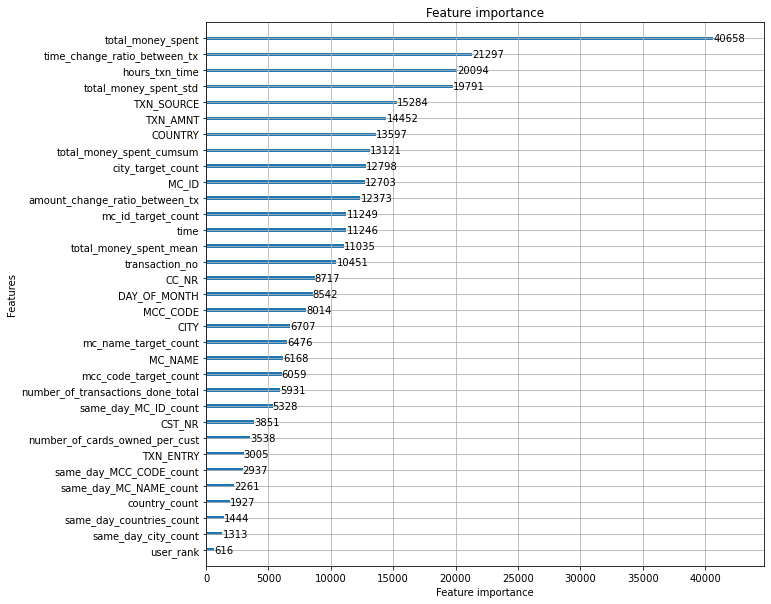

In [42]:
test["target"] = np.mean(test_preds,axis=0)
test[["musteri","target"]].head()

In [21]:
BEST_PARAMS = {'reg_alpha': 6.434206846036138, 'reg_lambda': 8.38224123586474, 'num_leaves': 310, 'min_child_samples': 35,
               'max_depth': 20, 'colsample_bytree': 0.24323782372695293, 'cat_smooth': 26, 
               'cat_l2': 17, 'min_data_per_group': 98,
              "metric": "auc", "objective" : "binary",
              "n_estimators": 10000, "learning_rate" : 0.005}  # 0.95966666

In [41]:
BEST_PARAMS = {'reg_alpha': 0.12665618126289094, 'reg_lambda': 0.6757060051258615, 'colsample_bytree': 0.3, 
               'subsample': 0.7, 'learning_rate': 0.017, 
               'max_depth': 100, 'num_leaves': 546, 'min_child_samples': 76, 'min_data_per_groups': 40}
#94.516

In [236]:
BEST_PARAMS  #9852 05.07 saat

{'objective': 'binary',
 'boosting_type': 'gbdt',
 'metric': 'auc',
 'learning_rate': 0.005,
 'n_estimators': 10000,
 'reg_alpha': 8.89323089675137,
 'reg_lambda': 9.231666425063862,
 'num_leaves': 846,
 'min_child_samples': 69,
 'max_depth': 22,
 'colsample_bytree': 0.3014847073159448,
 'cat_smooth': 20,
 'cat_l2': 7,
 'min_data_per_group': 76}

In [32]:
BEST_PARAMS.update(study.best_params)

In [29]:
BEST_PARAMS = {'objective': 'binary',
 'boosting_type': 'gbdt',
 'metric': 'auc',
 'reg_alpha': 5.779036820351425,
 'reg_lambda': 0.3863257484888971,
 'num_leaves': 429,
 'min_child_samples': 68,
 'max_depth': 39,
 'colsample_bytree': 0.4411517194043695,
 'cat_smooth': 47,
 'cat_l2': 15,
 'min_data_per_group': 133,
 'n_estimators': 10000,
 'learning_rate': 0.018043183851235208}

In [30]:
BEST_PARAMS = {'objective': 'binary',
 'boosting_type': 'gbdt',
 'metric': 'auc',
 'learning_rate': 0.005,
 'n_estimators': 10000,
 'reg_alpha': 3.764195042628452,
 'reg_lambda': 2.3541857108562168,
 'num_leaves': 759,
 'min_child_samples': 49,
 'max_depth': 26,
 'colsample_bytree': 0.3028825725341059,
 'cat_smooth': 86,
 'cat_l2': 19,
 'min_data_per_group': 113}

In [54]:
test = test[["ID", "target"]]
test.sort_values("ID", inplace = True)
submission_file = pd.read_csv("sample_submission.csv")
test.rename(columns = {"ID": "Id"}, inplace = True)
test = test.sort_values("Id")
subm = pd.merge(submission_file, test, on = "Id")
subm.drop(["Predicted"], 1, inplace = True)
subm.rename(columns = {"target": "Predicted"}, inplace = True)

C:\Users\ANALYT~1\AppData\Local\Temp/ipykernel_3556/1728463734.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  subm.drop(["Predicted"], 1, inplace = True)


In [56]:
real_test.target

224028    0.000809
236074    0.002005
5368      0.003755
5369      0.007283
5370      0.003245
            ...   
193784    0.000306
164854    0.000236
256864    0.000145
232517    0.000424
28560     0.000630
Name: target, Length: 326232, dtype: float64

In [59]:
subm.to_csv("öğrenelim.csv", index =False)